# Titanic Data Analysis
**Author:** Derek Fintel

**Date:** April, 04th, 2025 

**Objective:** Predicting a Continuous Target with Regression.


## Introduction
In this project we utilize a trusted Titanic dataset to conduct various analyses, exercise functions, and provide meaningful predicitions of target data. 

This project is organized into the following Sections:
- Section 0: Imports
- Section 1: Load and Inspect the Data
- Section 2: Data Exploration and Preparation
- Section 3: Feature Selection and Justification
- Section 4: Train a Regression Model (Linear Regression)
- Section 5: Compare Alternative Models
- Section 6: Final Thoughts & Insights

## Imports  
Below are our modules used.

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler

## Section 1. Load and Inspect the Data

### 1.1 Load the dataset and display its info
- We load the Titanic dataset directly from `seaborn`.
- We display summary information of the dataset using the info() method.

In [313]:
# We Load the 'titantic' dataset via sns.load_dataset
titanic = sns.load_dataset('titanic')

#We retrieve its summary info via '.info()'
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### 1.2 Display the first 10 rows.  

In [314]:
# Here we 'print' the first 10 rows via '.head(10)'
print(titanic.head(10))

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

## Section 2. Data Exploration and Preparation

### 2.1 Explore Data Patterns and Distributions
Prepare the Titanic data for regression modeling. See the previous work.

1) Impute missing values for age using median
2) Drop rows with missing fare (or impute if preferred)
3) Create numeric variables (e.g., family_size from sibsp + parch + 1)
4) Optional - convert categorical features (e.g. sex, embarked) if you think they might help your prediction model. (We do not know relationships until we evaluate things.)

In [315]:
# 1. Impute missing 'Age' values using median
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# 2. Drop rows with missing 'fare' (or impute if preferred)
titanic.dropna(subset=['fare'], inplace=True)

# Alternatively, you can impute fare instead of dropping:
# titanic['fare'].fillna(titanic['fare'].median(), inplace=True)

# 3. Create 'family_size' feature
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# 4. Optional: Convert categorical features to numeric

# Convert 'sex' to binary
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

# One-hot encode 'embarked' (drop_first avoids multicollinearity)
titanic = pd.get_dummies(titanic, columns=['embarked'], drop_first=True)

# Preview the cleaned data
print(titanic.head())


   survived  pclass  sex   age  sibsp  parch     fare  class    who  \
0         0       3    0  22.0      1      0   7.2500  Third    man   
1         1       1    1  38.0      1      0  71.2833  First  woman   
2         1       3    1  26.0      0      0   7.9250  Third  woman   
3         1       1    1  35.0      1      0  53.1000  First  woman   
4         0       3    0  35.0      0      0   8.0500  Third    man   

   adult_male deck  embark_town alive  alone  family_size  embarked_Q  \
0        True  NaN  Southampton    no  False            2       False   
1       False    C    Cherbourg   yes  False            2       False   
2       False  NaN  Southampton   yes   True            1       False   
3       False    C  Southampton   yes  False            2       False   
4        True  NaN  Southampton    no   True            1       False   

   embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


C:\Users\derek\AppData\Local\Temp\ipykernel_3716\770190317.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


## Section 3. Feature Selection and Justification
### 3.1 Choose two input features for predicting the target
Define multiple combinations of features to use as inputs to predict fare.

Use unique names (X1, y1, X2, y2, etc.) so results are visible and can be compared at the same time. 

Remember the inputs, usually X, are a 2D array. The target is a 1D array. 


In [316]:
# Case 1. age
X1 = titanic[['age']]
y1 = titanic['fare']
# Case 2. family_size
X2 = titanic[['family_size']]
y2 = titanic['fare']
# Case 3. age, family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']
# Case 4. parch
X4 = titanic[['parch']]
y4 = titanic['fare']

### Reflection of Section 3:

1) Why might these features affect a passenger’s fare:
2) List all available features:
3) Which other features could improve predictions and why:
4) How many variables are in your Case 4:
5) Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs: 

## Section 4. Train a Regression Model (Linear Regression)

### 4.1 Split the Data

In [317]:
# Train Case 1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)
# Train Case 2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)
# Train Case 3
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)
# Train Case 4
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)


### 4.2 Train and Evaluate Linear Regression Models (all 4 cases)

In [318]:
# Linear Regression for Case 1
lr_model1 = LinearRegression().fit(X1_train, y1_train)
# Linear Regression for Case 2
lr_model2 = LinearRegression().fit(X2_train, y2_train)
# Linear Regression for Case 3
lr_model3 = LinearRegression().fit(X3_train, y3_train)
# Linear Regression for Case 4
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions
# Case 1
y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)
# Case 2
y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)
# Predictions for Case 3
y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)
# Predictions for Case 4
y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)

### 4.3 Report Performance

In [319]:
# Evaluation for Case 1
print("Case 1: Training R²:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R²:", r2_score(y1_test, y_pred_test1))
print("Case 1: Test RMSE:", mean_squared_error(y1_test, y_pred_test1) ** 0.5)
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))
# Evaluation for Case 2
print("\nCase 2: Training R²:", r2_score(y2_train, y_pred_train2))
print("Case 2: Test R²:", r2_score(y2_test, y_pred_test2))
print("Case 2: Test RMSE:", mean_squared_error(y2_test, y_pred_test2) ** 0.5)
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y_pred_test2))
# Evaluation for Case 3
print("\nCase 3: Training R²:", r2_score(y3_train, y_pred_train3))
print("Case 3: Test R²:", r2_score(y3_test, y_pred_test3))
print("Case 3: Test RMSE:", mean_squared_error(y3_test, y_pred_test3) ** 0.5)
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y_pred_test3))
# Evaluation for Case 4
print("\nCase 4: Training R²:", r2_score(y4_train, y_pred_train4))
print("Case 4: Test R²:", r2_score(y4_test, y_pred_test4))
print("Case 4: Test RMSE:", mean_squared_error(y4_test, y_pred_test4) ** 0.5)
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y_pred_test4))

Case 1: Training R²: 0.009950688019452314
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 37.97164180172938
Case 1: Test MAE: 25.28637293162364

Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 37.6114940041967
Case 2: Test MAE: 25.02534815941641

Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 37.0777586646559
Case 3: Test MAE: 24.284935030470688

Case 4: Training R²: 0.051165530832692374
Case 4: Test R²: 0.0030800228833659515
Case 4: Test RMSE: 37.97804839823722
Case 4: Test MAE: 25.156643237188245


### Reflection of Section 4:

Compare the train vs test results for each.
1) Did Case 1 overfit or underfit? Explain:
   1) Ans: Underfit, R^2 is low for train & test. 
2) Did Case 2 overfit or underfit? Explain:
   1) Ans: Underfit, R^2 scores are still low for train & test.
3) Did Case 3 overfit or underfit? Explain:
   1) Ans: R^2 is still low but slightly higher, marginal underfit.
4) Did Case 4 overfit or underfit? Explain:
   1) Ans: Appears overfit, R^2 for test dropped. 

Adding Age
1) Did adding age improve the model: 
   1) Ans: Not substantially. 
2) Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that): 
   1) Ans: It's possible that 'age' didn't help due to it not having a strong linear relatonship to ticket price.

Worst
1) Which case performed the worst:
   1) Ans: Case 1
2) How do you know: 
   1) Ans: Case 1 had the lowest R^2 scores. 
3) Do you think adding more training data would improve it (and why/why not): 
   1) Ans: Possibly not due to underfitting amount.

Best
1) Which case performed the best:
   1) Ans: Case 3
2) How do you know: 
   1) Case 3 had the highest R^2 scores.
3) Do you think adding more training data would improve it (and why/why not): 
   1) Potentially


### Section 5. Compare Alternative Models
In this section, we will take the best-performing case and explore other regression models.

Choose Best Case to Continue
Choose the best case model from the four cases. Use that model to continue to explore additional continuous prediction models. The following assumes that Case 1 was the best predictor  - this may not be the case. Adjust the code to use your best case model instead. 

Choosing Options
When working with regression models, especially those with multiple input features, we may run into overfitting — where a model fits the training data too closely and performs poorly on new data. To prevent this, we can apply regularization.

Regularization adds a penalty to the model’s loss function, discouraging it from using very large weights (coefficients). This makes the model simpler and more likely to generalize well to new data.

In general: 
- If the basic linear regression is overfitting, try Ridge.
- If you want the model to automatically select the most important features, try Lasso.
- If you want a balanced approach, try Elastic Net.

In [320]:
# Assuming Case 1 (Age) as the best case for regression
X = titanic[['age']]
y = titanic['fare']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store models and results
models = {
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {
        "MSE": mse,
        "R²": r2,
        "Coefficients": model.coef_
    }
    print(f"{name} Regression - MSE: {mse:.3f}, R²: {r2:.3f}")

# You can check the results for each model
for name, result in results.items():
    print(f"\n{name} Results:")
    print(f"MSE: {result['MSE']:.3f}")
    print(f"R²: {result['R²']:.3f}")
    print(f"Coefficients: {result['Coefficients']}")


Ridge Regression - MSE: 1524.637, R²: 0.015
Lasso Regression - MSE: 1524.643, R²: 0.015
ElasticNet Regression - MSE: 1524.641, R²: 0.015

Ridge Results:
MSE: 1524.637
R²: 0.015
Coefficients: [0.36204943]

Lasso Results:
MSE: 1524.643
R²: 0.015
Coefficients: [0.36146061]

ElasticNet Results:
MSE: 1524.641
R²: 0.015
Coefficients: [0.36164951]


### 5.2 Elastic Net (L1 + L2 combined)
Lasso Regression uses the L1 penalty, which adds the sum of absolute values of the coefficients to the loss function. Lasso can shrink some coefficients all the way to zero, effectively removing less important features. This makes it useful for feature selection.

- Penalty term: L1 = sum of absolute values of weights
- Effect: Can shrink some weights to zero (drops features), simplifies the model
Elastic Net combines both L1 (Lasso) and L2 (Ridge) penalties. It balances the feature selection ability of Lasso with the stability of Ridge.

We control the balance with a parameter called l1_ratio:
- If l1_ratio = 0, it behaves like Ridge
- If l1_ratio = 1, it behaves like Lasso
- Values in between mix both types
- Penalty term: α × (L1 + L2)
- Effect: Shrinks weights and can drop some features — flexible and powerful

In [321]:
# Assuming you want to use 'age', 'family_size', and 'parch' for the ElasticNet model
X = titanic[['age', 'family_size', 'parch']]
y = titanic['fare']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train ElasticNet with scaled features
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_scaled, y)

# Predict and evaluate
y_pred_elastic = elastic_model.predict(X_scaled)
mse_elastic = mean_squared_error(y, y_pred_elastic)
r2_elastic = r2_score(y, y_pred_elastic)

print(f"Elastic Net - MSE: {mse_elastic:.3f}, R²: {r2_elastic:.3f}")
print(f"Elastic Net Coefficients: {elastic_model.coef_}")


Elastic Net - MSE: 2282.922, R²: 0.074
Elastic Net Coefficients: [6.33426796 6.86793796 5.48097229]


In [322]:
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X1_train, y1_train)
y_pred_elastic = elastic_model.predict(X1_test)

### 5.3 Polynomial Regression
Linear regression is a simple two dimensional relationship - a simple straight line. But we can test more complex relationships. Polynomial regression adds interaction and nonlinear terms to the model. Be careful here - higher-degree polynomials can easily overfit.

In [323]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X1_train)
X_test_poly = poly.transform(X1_test)

# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y1_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Use the correct variable name for predictions
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the Polynomial Regression model
mse_poly = mean_squared_error(y1_test, y_pred_poly)
r2_poly = r2_score(y1_test, y_pred_poly)

print(f"Polynomial Regression - MSE: {mse_poly:.3f}, R²: {r2_poly:.3f}")

Polynomial Regression - MSE: 1451.569, R²: -0.003


### 5.4 Visualize Polynomial Cubic Fit (for 1 input feature)
Choose a case with just one input feature and plot it. For example:

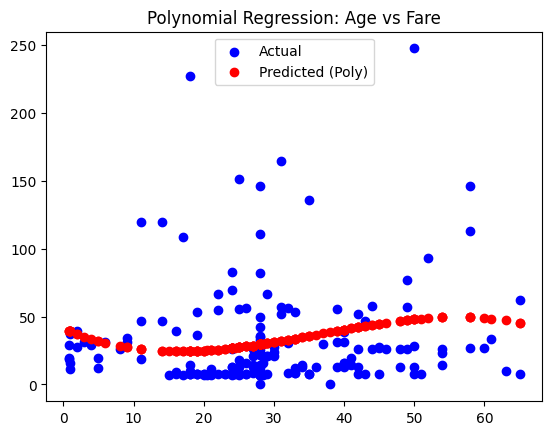

In [324]:
plt.scatter(X1_test, y1_test, color='blue', label='Actual')
plt.scatter(X1_test, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Age vs Fare")
plt.show()

### 5.4 Reflections:

1) What patterns does the cubic model seem to capture:
   1) Ans: It does a nice job of portraying the curvature between 'age' and 'fare'.
2) Where does it perform well or poorly:
   1) Ans: The model doesn't perform great across the spread of 'age'. 
3) Did the polynomial fit outperform linear regression:
   1) Ans: No, both had the same R^2. 
4) Where (on the graph or among which kinds of data points) does it fit best:
   1) Ans: Fits strongly between ages 20 & 40. 

### 5.4 Compare All Models
Create a summary table or printout comparing all models:

In [325]:
# ElasticNet predictions (you may have already done this one)
y_pred_elastic = elastic_model.predict(X1_test)

# Polynomial predictions (assuming poly_model and X_test_poly are set up correctly)
y_pred_poly = poly_model.predict(X_test_poly)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X1_train, y1_train)
y_pred_ridge = ridge_model.predict(X1_test)

# Ridge predictions
y_pred_ridge = ridge_model.predict(X1_test)

def report(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)  # Manually compute RMSE
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"{name} R²: {r2:.3f}")
    print(f"{name} RMSE: {rmse:.2f}")
    print(f"{name} MAE: {mae:.2f}\n")

# Now you can call the report function for each model
report("Linear", y1_test, y_pred_test1)
report("Ridge", y1_test, y_pred_ridge)
report("ElasticNet", y1_test, y_pred_elastic)
report("Polynomial", y1_test, y_pred_poly)


Linear R²: 0.003
Linear RMSE: 37.97
Linear MAE: 25.29

Ridge R²: 0.003
Ridge RMSE: 37.97
Ridge MAE: 25.29

ElasticNet R²: 0.003
ElasticNet RMSE: 37.97
ElasticNet MAE: 25.28

Polynomial R²: -0.003
Polynomial RMSE: 38.10
Polynomial MAE: 25.30



### 5.5 Visualize Higher Order Polynomial (for the same 1 input case)
Use the same single input case as you visualized above, but use a higher degree polynomial (e.g. 4, 5, 6, 7, or 8). Plot the result. 

In a Markdown cell, tell us which option seems to work better - your initial cubic (3) or your higher order and why. 

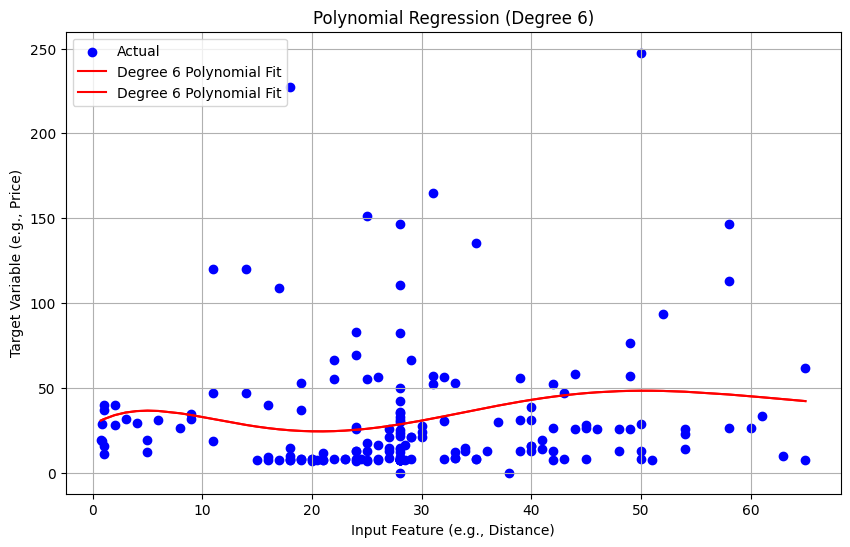

In [326]:
# Let's go with degree 6 this time
degree = 6
poly_high = PolynomialFeatures(degree=degree)
X_train_high = poly_high.fit_transform(X1_train)
X_test_high = poly_high.transform(X1_test)

# Fit the model
high_poly_model = LinearRegression()
high_poly_model.fit(X_train_high, y1_train)

# Predict using this model
y_pred_high = high_poly_model.predict(X_test_high)

# Visualize
plt.figure(figsize=(10, 6))

# Scatter the test data
plt.scatter(X1_test, y1_test, color='blue', label='Actual')

# Sort values for smoother curve
X1_test_array = X1_test.values.flatten()  # If it's a DataFrame
sorted_idx = np.argsort(X1_test_array)
X_sorted = X1_test_array[sorted_idx]
y_sorted = y_pred_high[sorted_idx]

# Plot the high-order polynomial prediction
plt.plot(X_sorted, y_sorted, color='red', label=f'Degree {degree} Polynomial Fit')

# Plot the high-order polynomial prediction
plt.plot(X_sorted, y_sorted, color='red', label=f'Degree {degree} Polynomial Fit')

plt.title(f'Polynomial Regression (Degree {degree})')
plt.xlabel('Input Feature (e.g., Distance)')
plt.ylabel('Target Variable (e.g., Price)')
plt.legend()
plt.grid(True)
plt.show()


### Section 6. Final Thoughts & Insights
Your notebook should tell a data story. Use this section to demonstrate your thinking and value as an analyst.

### 6.1 Summarize Findings
1) What features were most useful? 
   1) Ans: Sex and Age were helpful base parameters.
2) What regression model performed best? 
   1) Ans: Poly appeared to smoothen everything out. 
3) How did model complexity or regularization affect results?
   1) Ans: Increasing the polynomial degree helped sharpen the plotting/insights. 

### 6.2 Discuss Challenges
1) Was fare hard to predict? Why?
   1) Ans: It was as the selected inputs did not reveal strong correlations to 'fare'.
2) Did skew or outliers impact the models?
   1) Ans: Yes, and particularly around how 'fare' data may have been affected/influenced.  

### 6.3 Optional Next Steps
1) Try different features besides the ones used (e.g., pclass, sex if you didn't use them this time)
2) Try predicting age instead of fare
3) Explore log transformation of fare to reduce skew